<a href="https://colab.research.google.com/github/NayoungShin/projectmanager/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%A4%EC%8A%B5_%ED%85%8D%EC%8A%A4%ED%8A%B8%EB%B6%84%EC%84%9D_%EB%B0%8F_%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#문서단어행렬

In [6]:
!pip install pandas

In [7]:
import pandas as pd

In [10]:
df = pd.read_excel('./sample_data/yelp.xlsx')
df.head()

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500, stop_words='english') # 500개까지만 해주고, the a 같은건 빼고 해줘

In [13]:
dtm = cv.fit_transform(df['review'])

In [14]:
dtm.shape

(1000, 500)

In [15]:
word_count = pd.DataFrame({
	'단어': cv.get_feature_names_out(),
	'빈도': dtm.sum(axis=0).flat
})

In [20]:
# 식당 리뷰에 많이 나오는 단어 상위 20개
word_count.sort_values('빈도', ascending=False).head(20)


,단어,빈도
156,food,126
316,place,106
175,good,95
389,service,85
178,great,70
231,like,46
442,time,42
343,really,36
220,just,35
41,best,30


In [21]:
cv.get_feature_names_out()

array(['10', '100', '12', '20', '30', '35', '40', 'absolutely', 'ago',
       'amazing', 'ambiance', 'ambience', 'anytime', 'area', 'arrived',
       'ask', 'asked', 'ate', 'atmosphere', 'attentive', 'authentic',
       'average', 'avoid', 'away', 'awesome', 'awful', 'bacon', 'bad',
       'bar', 'barely', 'basically', 'bathroom', 'batter', 'bay', 'beans',
       'beat', 'beautiful', 'beef', 'beer', 'believe', 'belly', 'best',
       'better', 'big', 'biscuits', 'bisque', 'bit', 'bite', 'bites',
       'black', 'bland', 'boyfriend', 'bread', 'breakfast', 'bring',
       'brought', 'brunch', 'buffet', 'burger', 'burgers', 'business',
       'busy', 'butter', 'cafe', 'came', 'care', 'check', 'checked',
       'cheese', 'chef', 'chewy', 'chicken', 'chips', 'clean', 'close',
       'cold', 'come', 'coming', 'considering', 'cooked', 'cool',
       'couldn', 'couple', 'course', 'cream', 'customer', 'damn', 'day',
       'deal', 'decor', 'definitely', 'delicious', 'delish', 'deserves',
      

In [18]:
# 엑셀 파일로 저장: 점 세 개 버튼을 누르면 다운로드 가능
word_count.to_excel('./sample_data/word_count.xlsx')

In [22]:
!pip install wordcloud

In [25]:
from wordcloud import WordCloud

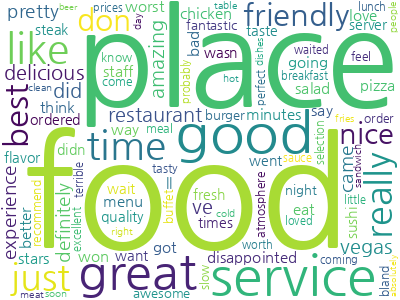

In [26]:
wc = WordCloud(
    font_path='./sample_data/NanumGothic.ttf', # 원하는 글꼴은 눈누 등의 사이트에서 다운받아 쓰세요
    background_color='white',
    max_words=100,
    width=400,
    height=300
)

count_dic = dict(zip(word_count.단어, word_count.빈도))
cloud = wc.fit_words(count_dic)
cloud.to_image()

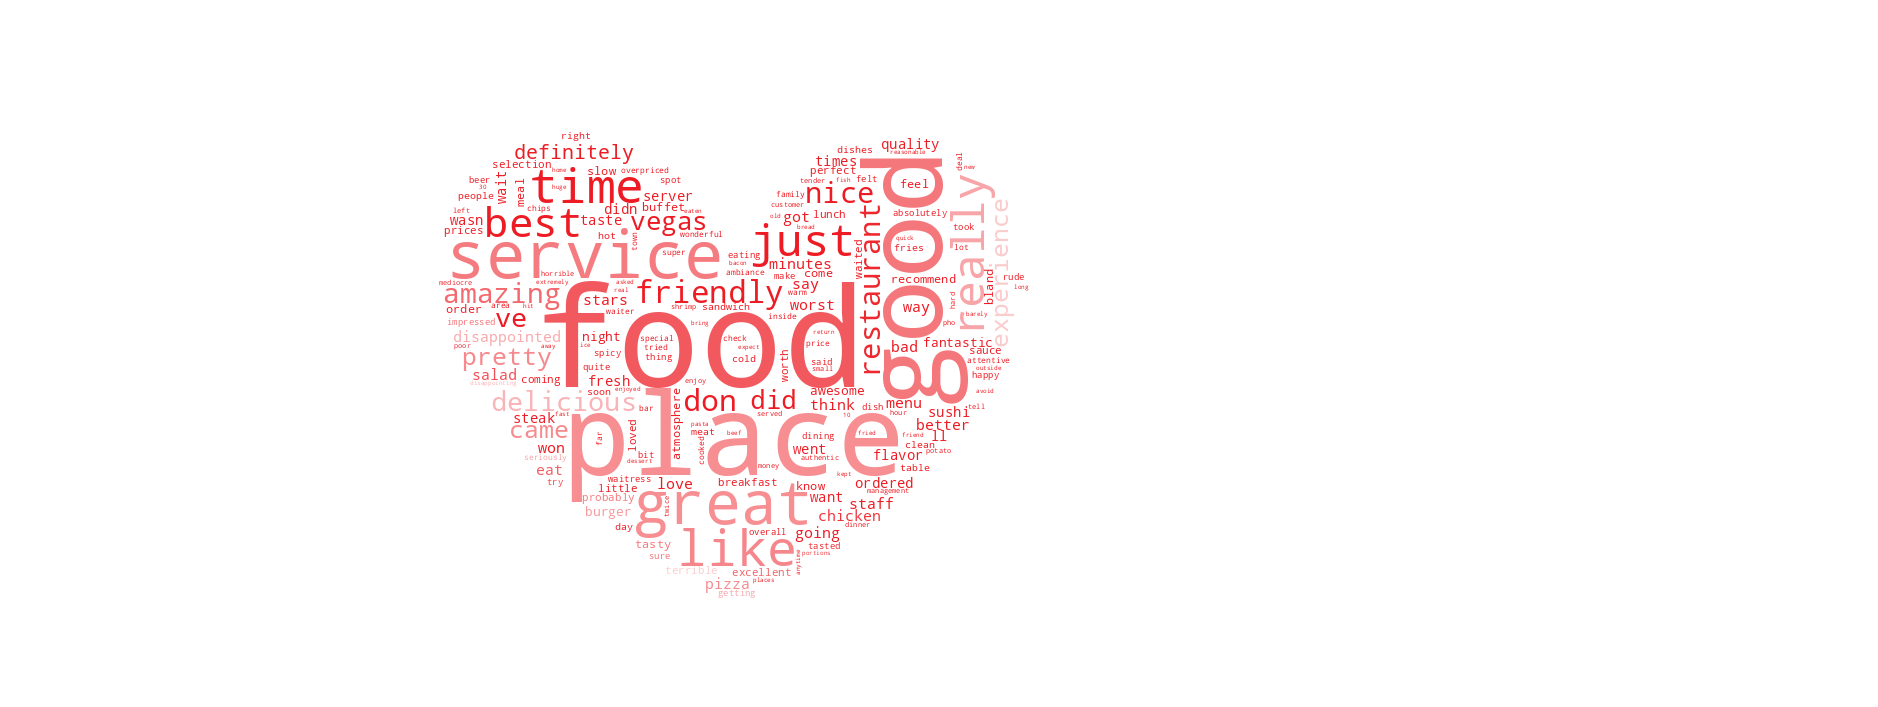

In [27]:
from PIL import Image
import numpy as np

# 그림을 불러온다
mask = np.asarray(Image.open('./sample_data/mask.png'))

# 그림대로 모양을 잡아준다
wc = WordCloud(background_color='white', mask=mask)
wc.fit_words(count_dic)

# 색칠을 해준다
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)
cloud = wc.recolor(color_func=color_func)
cloud.to_image()

In [28]:
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 41.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=fffbe8a1a50741432bc3da81121e8b3c64e9e4d44d56b927f62f2403a80d35b5
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [29]:
from kiwipiepy import Kiwi
kiwi=Kiwi()

In [30]:
kiwi.tokenize('오늘은 쌀국수 먹기 좋은 날씨다.')

[Token(form='오늘', tag='NNG', start=0, len=2),
 Token(form='은', tag='JX', start=2, len=1),
 Token(form='쌀국수', tag='NNG', start=4, len=3),
 Token(form='먹', tag='VV', start=8, len=1),
 Token(form='기', tag='ETN', start=9, len=1),
 Token(form='좋', tag='VA', start=11, len=1),
 Token(form='은', tag='ETM', start=12, len=1),
 Token(form='날씨', tag='NNG', start=14, len=2),
 Token(form='이', tag='VCP', start=16, len=0),
 Token(form='다', tag='EF', start=16, len=1),
 Token(form='.', tag='SF', start=17, len=1)]

In [31]:
def extract_nouns(text):
    result = kiwi.tokenize(text)
    for token in result:
        if token.tag in ['NNG', 'NNP']:
            yield token.form

In [32]:
list(extract_nouns('어제는 홍차를 마시고, 오늘은 커피를 마셨다.'))

['어제', '홍차', '오늘', '커피']

In [33]:
df=pd.read_csv('./sample_data/news_ai.csv')

In [34]:

kiwi = Kiwi()
kiwi.add_user_word('인공지능', 'NNG') #인공, 지능 두 단어로 하느것을 인공지능을 MNG로 처리

cv = CountVectorizer(max_features=100, tokenizer=extract_nouns)
dtm = cv.fit_transform(df['본문'])
word_count = pd.DataFrame({
	'단어': cv.get_feature_names_out(),
	'빈도': dtm.sum(axis=0).flat
})
word_count.sort_values('빈도', ascending=False).head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,단어,빈도
18,기술,279
70,인공지능,247
12,교육,146
2,개발,144
80,제공,116
76,전형,109
45,서비스,107
22,대표,106
84,지원,103
41,산업,101


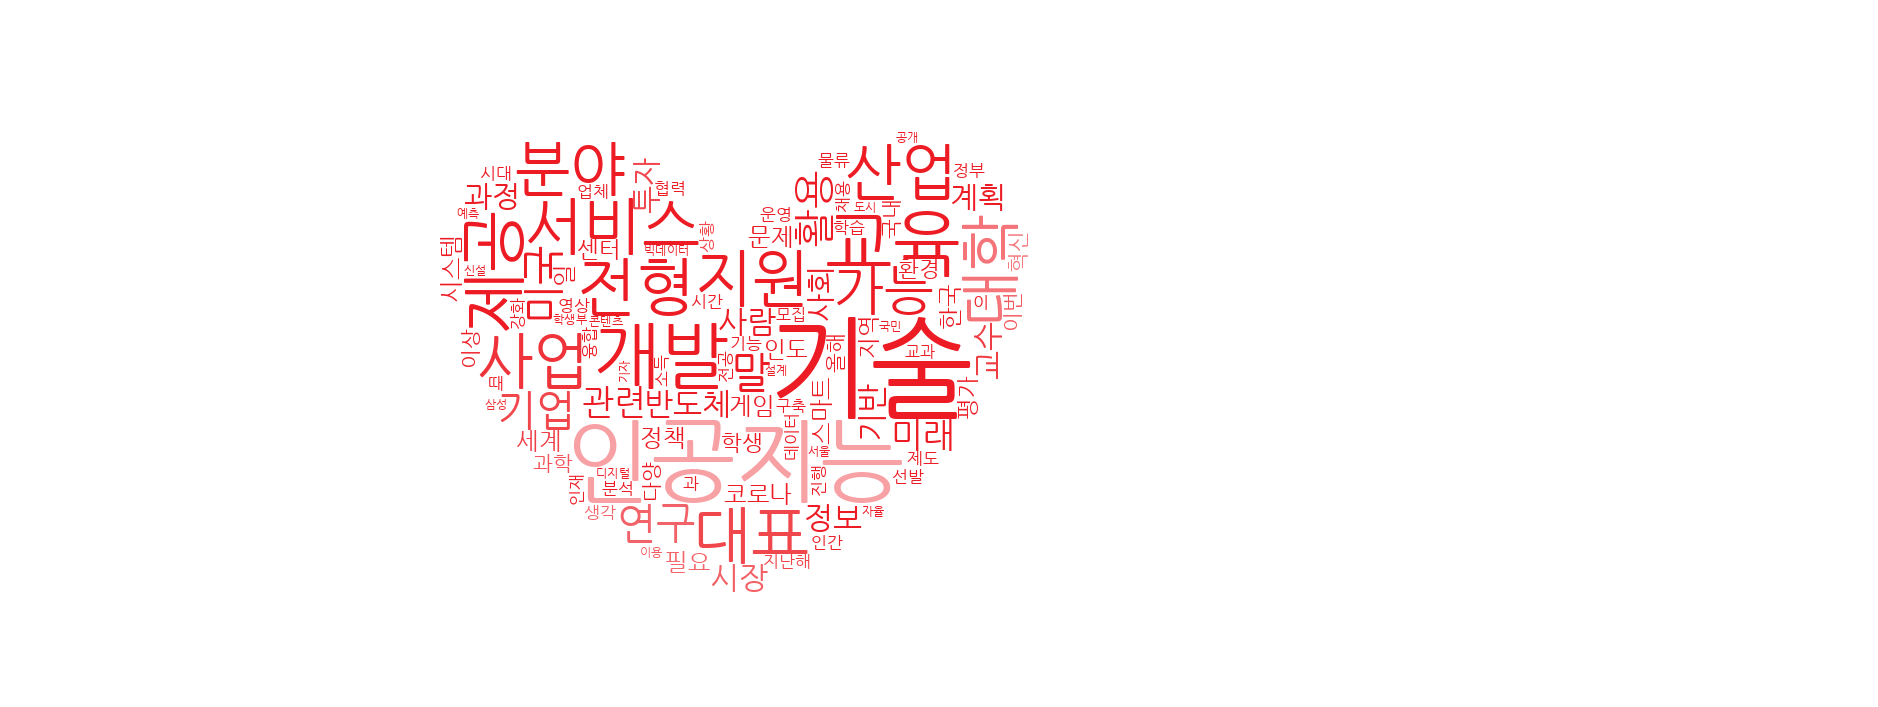

In [36]:
count_dic = dict(zip(word_count.단어, word_count.빈도))
mask = np.asarray(Image.open('./sample_data/mask.png'))

# 그림대로 모양을 잡아준다
wc = WordCloud(background_color='white', font_path='./sample_data/NanumGothic.ttf', mask=mask)
wc.fit_words(count_dic)

# 색칠을 해준다
from wordcloud import ImageColorGenerator
color_func = ImageColorGenerator(mask)
cloud = wc.recolor(color_func=color_func)
cloud.to_image()